<a href="https://colab.research.google.com/github/NicholasDow/Folder-of-Fail/blob/main/Citadel_datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

In [ ]:
import os

In [ ]:
wd = os.getcwd()

In [ ]:
if 'google.colab' in str(get_ipython()):
  location = 'drive/MyDrive/citadel_datathon/provided_data/'
else:
  location = 'citadel_datathon/provided_data/'

In [ ]:
import pandas as pd

In [ ]:
files = {}
from collections import defaultdict

I'm loading in the data here.

In [ ]:
count = 0
for foldername in os.listdir(location):
  for filename in os.listdir(location + foldername):
    files[str(count) +'-'+ foldername + '-' + filename[:-4]] = pd.read_csv(os.path.join(location,foldername,filename)) 
    count += 1

In [ ]:
files.keys()

dict_keys(['0-2_ecdc-country_response_measures', '1-2_ecdc-testing', '2-2_ecdc-agerangenotificationeu', '3-2_ecdc-admissionrates', '4-2_ecdc-weeklynotificationeu', '5-2_ecdc-notification', '6-2_ecdc-dailynotificationeu', '7-1_owid-owid-covid-data', '8-3_covidtracking-alabama-history', '9-3_covidtracking-national-history'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

I'm printing out summary statistics here

In [ ]:
print(files.keys())

dict_keys(['0-2_ecdc-country_response_measures', '1-2_ecdc-testing', '2-2_ecdc-agerangenotificationeu', '3-2_ecdc-admissionrates', '4-2_ecdc-weeklynotificationeu', '5-2_ecdc-notification', '6-2_ecdc-dailynotificationeu', '7-1_owid-owid-covid-data', '8-3_covidtracking-alabama-history', '9-3_covidtracking-national-history'])


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
for key in files.keys():
  print('----')
  print(key)
  print('----')
  df = files[key]
  print('---head---')
  print(df.head(5))
  print('---tail---')
  print(df.tail(5))
  print('---info---')
  df.info()

----
0-2_ecdc-country_response_measures
----
---head---
   Country       Response_measure  date_start    date_end
0  Austria  AdaptationOfWorkplace  2020-03-10         NaN
1  Austria         BanOnAllEvents  2020-11-03         NaN
2  Austria            ClosDaycare  2020-03-16  2020-05-04
3  Austria     ClosDaycarePartial  2020-11-17  2020-12-07
4  Austria               ClosHigh  2020-03-16  2020-09-30
---tail---
             Country      Response_measure  date_start    date_end
1334  United Kingdom  StayHomeOrderPartial  2020-05-10  2020-07-04
1335  United Kingdom         StayHomeRiskG  2020-03-16  2020-07-05
1336  United Kingdom         StayHomeRiskG  2020-11-05  2020-12-01
1337  United Kingdom  StayHomeRiskGPartial  2020-07-06  2020-08-01
1338  United Kingdom           Teleworking  2020-03-16         NaN
---info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------         

In [ ]:
for key in files.keys():
  print('----')
  print(key)
  print('----')
  df = files[key]
  print(len(df.columns))

----
0-2_ecdc-country_response_measures
----
4
----
1-2_ecdc-testing
----
9
----
2-2_ecdc-agerangenotificationeu
----
8
----
3-2_ecdc-admissionrates
----
7
----
4-2_ecdc-weeklynotificationeu
----
6
----
5-2_ecdc-notification
----
10
----
6-2_ecdc-dailynotificationeu
----
6
----
7-1_owid-owid-covid-data
----
52
----
8-3_covidtracking-alabama-history
----
42
----
9-3_covidtracking-national-history
----
18


*Alabama* dataset exploration 

In [ ]:
# so covid tracking for states has many columns maybe dimmension reduction can be a thing here idk
df = files['8-3_covidtracking-alabama-history']

In [ ]:
df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,298.000000,249.000000,306.000000,221.000000,278.000000,278.000000,289.000000,306.000000,271.000000,0.0,3.030000e+02,306.000000,0.0,0.0,0.0,271.000000,0.0,306.000000,306.000000,306.000000,306.0,0.0,0.0,0.0,0.0,0.0,230.000000,0.0,306.0,3.060000e+02,306.000000,0.0,0.0,128.000000,0.0,3.060000e+02,306.000000,0.0,306.0
mean,1864.073826,2052.429719,16.320261,180.570136,12918.510791,12918.510791,1051.027682,117.839869,1376.856089,NaN,6.829219e+05,5271.049020,NaN,NaN,NaN,781.269373,NaN,112646.186275,97950.130719,1255.503268,0.0,NaN,NaN,NaN,NaN,NaN,71986.230435,NaN,0.0,7.741217e+05,6278.464052,NaN,NaN,67601.843750,NaN,7.741217e+05,6278.464052,NaN,0.0
std,1409.274793,1112.808071,19.446827,177.089758,10243.315128,10243.315128,650.681282,263.886222,713.177811,NaN,5.195021e+05,4367.092593,NaN,NaN,NaN,407.893020,NaN,105608.791525,86411.235740,1180.746564,0.0,NaN,NaN,NaN,NaN,NaN,57832.235401,NaN,0.0,6.066820e+05,4930.864024,NaN,NaN,10301.594639,NaN,6.066820e+05,4930.864024,NaN,0.0
min,0.000000,290.000000,-15.000000,2.000000,212.000000,212.000000,74.000000,0.000000,177.000000,NaN,0.000000e+00,-27925.000000,NaN,NaN,NaN,113.000000,NaN,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,7951.000000,NaN,0.0,0.000000e+00,-26943.000000,NaN,NaN,54076.000000,NaN,0.000000e+00,-26943.000000,NaN,0.0
25%,593.750000,984.000000,2.000000,43.000000,2211.750000,2211.750000,593.000000,0.000000,691.000000,NaN,1.735285e+05,2779.000000,NaN,NaN,NaN,403.000000,NaN,13656.750000,13656.750000,325.750000,0.0,NaN,NaN,NaN,NaN,NaN,29736.000000,NaN,0.0,1.789950e+05,3318.000000,NaN,NaN,59020.750000,NaN,1.789950e+05,3318.000000,NaN,0.0
50%,1822.000000,2144.000000,11.000000,137.000000,13330.000000,13330.000000,856.000000,31.000000,1391.000000,NaN,6.511150e+05,5159.500000,NaN,NaN,NaN,754.000000,NaN,97446.500000,94114.500000,938.000000,0.0,NaN,NaN,NaN,NaN,NaN,54223.000000,NaN,0.0,7.412680e+05,6270.500000,NaN,NaN,65456.500000,NaN,7.412680e+05,6270.500000,NaN,0.0
75%,2864.250000,2818.000000,22.000000,243.000000,20213.500000,20213.500000,1386.000000,171.500000,2063.000000,NaN,1.129806e+06,7231.250000,NaN,NaN,NaN,1189.500000,NaN,176430.000000,154460.500000,1768.750000,0.0,NaN,NaN,NaN,NaN,NaN,84471.000000,NaN,0.0,1.278902e+06,8903.000000,NaN,NaN,74827.000000,NaN,1.278902e+06,8903.000000,NaN,0.0
max,4994.000000,4346.000000,135.000000,648.000000,36059.000000,36059.000000,3080.000000,3656.000000,2448.000000,NaN,1.612941e+06,21670.000000,NaN,NaN,NaN,1404.000000,NaN,384184.000000,308269.000000,5498.000000,0.0,NaN,NaN,NaN,NaN,NaN,211684.000000,NaN,0.0,1.921210e+06,27230.000000,NaN,NaN,89641.000000,NaN,1.921210e+06,27230.000000,NaN,0.0


In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df

,column_name,percent_missing
date,date,0.000000
totalTestsPeopleViralIncrease,totalTestsPeopleViralIncrease,0.000000
totalTestsPeopleViral,totalTestsPeopleViral,0.000000
totalTestResultsIncrease,totalTestResultsIncrease,0.000000
totalTestResults,totalTestResults,0.000000
totalTestEncountersViralIncrease,totalTestEncountersViralIncrease,0.000000
positiveScore,positiveScore,0.000000
positiveIncrease,positiveIncrease,0.000000
positiveCasesViral,positiveCasesViral,0.000000
negativeIncrease,negativeIncrease,0.000000


In [ ]:
import numpy as np
corr_matrix = df.corr().abs()

In [ ]:
# takes part of corr
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['deathConfirmed', 'deathProbable', 'hospitalized', 'hospitalizedCumulative', 'inIcuCumulative', 'negative', 'onVentilatorCumulative', 'positive', 'positiveCasesViral', 'recovered', 'totalTestResults', 'totalTestResultsIncrease', 'totalTestsPeopleAntibody', 'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease']


In [ ]:
# I want to see what column names are shared among the datasets

for key in files.keys():
  print(key)
  print(files[key].columns)

0-2_ecdc-country_response_measures
Index(['Country', 'Response_measure', 'date_start', 'date_end'], dtype='object')
1-2_ecdc-testing
Index(['country', 'country_code', 'year_week', 'new_cases', 'tests_done',
       'population', 'testing_rate', 'positivity_rate', 'testing_data_source'],
      dtype='object')
2-2_ecdc-agerangenotificationeu
Index(['country', 'country_code', 'year_week', 'age_group', 'new_cases',
       'population', 'rate_14_day_per_100k', 'source'],
      dtype='object')
3-2_ecdc-admissionrates
Index(['country', 'indicator', 'date', 'year_week', 'value', 'source', 'url'], dtype='object')
4-2_ecdc-weeklynotificationeu
Index(['country', 'region_name', 'nuts_code', 'year_week',
       'rate_14_day_per_100k', 'source'],
      dtype='object')
5-2_ecdc-notification
Index(['country', 'country_code', 'continent', 'population', 'indicator',
       'weekly_count', 'year_week', 'rate_14_day', 'cumulative_count',
       'source'],
      dtype='object')
6-2_ecdc-dailynotificationeu


In [ ]:
keys = list(files.keys())

In [ ]:
missing = files[keys[7]].isna().sum() / len(files[keys[7]])
missing_value_df = pd.DataFrame({'column_name': files[keys[7]].columns,
                                 'percent_missing': missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df['percent_missing'][:26]

location                           0.000000
date                               0.000000
iso_code                           0.005726
population                         0.005726
total_cases                        0.009337
new_cases                          0.009458
life_expectancy                    0.010833
continent                          0.011727
total_cases_per_million            0.015063
new_cases_per_million              0.015184
new_deaths_smoothed                0.025880
new_cases_smoothed                 0.025880
population_density                 0.026774
diabetes_prevalence                0.027152
new_deaths_smoothed_per_million    0.031520
new_cases_smoothed_per_million     0.031520
cardiovasc_death_rate              0.038226
human_development_index            0.043987
gdp_per_capita                     0.048200
median_age                         0.048475
aged_70_older                      0.053874
aged_65_older                      0.059549
hospital_beds_per_thousand      

In [ ]:
owid = files[keys[7]]

In [ ]:
# We should probably take into account the date the virus entered the country
# --> 300 days after first case
owid['date'] = pd.to_datetime(owid['date'])
owid['first_case_date'] = owid.groupby('location')['date'].transform(min)
owid['days_from_first_case'] = owid['date'] - owid['first_case_date']
df = owid

In [ ]:
missing = df.isna().sum() / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df

,column_name,percent_missing
days_from_first_case,days_from_first_case,0.000000
location,location,0.000000
date,date,0.000000
first_case_date,first_case_date,0.000000
population,population,0.005726
iso_code,iso_code,0.005726
total_cases,total_cases,0.009337
new_cases,new_cases,0.009458
life_expectancy,life_expectancy,0.010833
continent,continent,0.011727


In [ ]:
most_of_it = missing_value_df[missing_value_df.percent_missing < .23].column_name
less_of_it = missing_value_df[missing_value_df.percent_missing < .10].column_name

In [ ]:
#I split these up to see how many values would be missing
most = df[most_of_it].dropna()
less = df[less_of_it].dropna()
print(len(most))
print(len(less))

35002
51755


In [ ]:
pcamost = most.select_dtypes(include=['float64'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standardPCAmost = StandardScaler().fit_transform(pcamost)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=4)

In [ ]:
pComponent = pca.fit_transform(standardPCAmost)

In [ ]:
principalDf = pd.DataFrame(data = pComponent
             , columns = ['pca1','pca2','pca3','pca4'])

In [ ]:
principalDf

,pca1,pca2,pca3,pca4
0,-3.394385,2.165650,0.472009,0.496150
1,-3.392219,2.164894,0.471844,0.499580
2,-3.391841,2.165079,0.472156,0.499575
3,-3.392958,2.164496,0.471253,0.499293
4,-3.391649,2.165127,0.472350,0.499184
...,...,...,...,...
34997,-2.940763,1.769033,0.508277,1.185606
34998,-2.945852,1.766172,0.502644,1.178525
34999,-2.921263,1.775124,0.532820,1.186226
35000,-2.944679,1.766557,0.503726,1.178768


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pComponent)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 19825, 1: 14479, 2: 698}

In [ ]:
# it's not the worst

In [ ]:
print(len(kmeans.labels_))
print(len(most))

35002
35002


In [ ]:
most['group_column'] = kmeans.labels_

In [ ]:
most[(most.location == 'Afghanistan')].group_column.unique()

array([0], dtype=int32)

In [ ]:
most[(most.location == 'China')].group_column.unique()

array([0], dtype=int32)

In [ ]:
most[(most.location == 'South Korea')].group_column.unique()

array([1], dtype=int32)

In [ ]:
most[(most.location == 'Vietnam')].group_column.unique()

array([0], dtype=int32)

In [ ]:
most[(most.location == 'Brazil')].group_column.unique()

array([0, 1, 2], dtype=int32)

In [ ]:
most[(most.location == 'Germany')].group_column.unique()

array([1], dtype=int32)

In [ ]:
most[(most.location == 'United States')].group_column.unique()

array([1, 2], dtype=int32)

In [ ]:
most[(most.location == 'Argentina')].group_column.unique()

array([1, 0, 2], dtype=int32)

YO fuck this bullshit, I'm just being dumb

In [ ]:
toy = df[['location','date','total_cases']]

In [ ]:
pivoted_df = toy.pivot(index = 'date', columns = 'location', values = 'total_cases').fillna(1)

In [ ]:
pivoted_df

location,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-01-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-01-03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [ ]:
for col in pivoted_df.columns:
  pivoted_df[col] = pivoted_df[col].pct_change()

In [ ]:
pivoted_df.drop(columns = ['World','International'], inplace = True)

In [ ]:
corrMatrix = pivoted_df.corr()

In [ ]:
names = ['Mexico','United States','China','Vietnam','South Korea','South Africa','Afghanistan','Brazil','Germany','United Kingdom','Ireland','India']

In [ ]:
temp = corrMatrix.loc[names,names]

In [ ]:
temp

location,Mexico,United States,China,Vietnam,South Korea,South Africa,Afghanistan,Brazil,Germany,United Kingdom,Ireland,India
location,,,,,,,,,,,,
Mexico,1.000000,0.326750,-0.013664,0.055667,0.045022,0.201195,0.114623,0.542924,0.273231,0.100655,0.211522,0.038628
United States,0.326750,1.000000,-0.019012,0.107655,0.251348,0.314927,0.316441,0.367378,0.284061,0.361882,0.368005,0.256849
China,-0.013664,-0.019012,1.000000,-0.009584,-0.010467,-0.015627,-0.018246,-0.015197,-0.011969,-0.013775,-0.011867,-0.011332
Vietnam,0.055667,0.107655,-0.009584,1.000000,-0.004038,0.252699,0.060931,0.098353,0.186245,0.156522,0.052361,0.018838
South Korea,0.045022,0.251348,-0.010467,-0.004038,1.000000,-0.043628,-0.017305,0.000353,0.078157,0.173929,0.003691,0.003075
South Africa,0.201195,0.314927,-0.015627,0.252699,-0.043628,1.000000,0.303881,0.283213,0.175271,0.162858,0.236164,0.084822
Afghanistan,0.114623,0.316441,-0.018246,0.060931,-0.017305,0.303881,1.000000,0.296117,0.140246,0.200065,0.577383,0.580468
Brazil,0.542924,0.367378,-0.015197,0.098353,0.000353,0.283213,0.296117,1.000000,0.289279,0.167396,0.793655,0.322731
Germany,0.273231,0.284061,-0.011969,0.186245,0.078157,0.175271,0.140246,0.289279,1.000000,0.196999,0.243019,0.123030


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(100, 48))

<Figure size 7200x3456 with 0 Axes>

<Figure size 7200x3456 with 0 Axes>

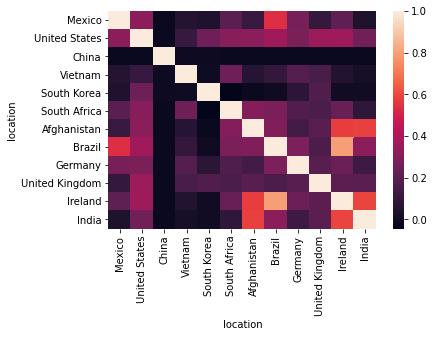

In [ ]:
sns.heatmap(temp)
plt.show()

I'm Going to try to make a new dataset here where, the response is in a column

In [ ]:
country_response = files[keys[0]]
country_response

,Country,Response_measure,date_start,date_end,count
0,Austria,AdaptationOfWorkplace,2020-03-10,NaT,1
1,Austria,BanOnAllEvents,2020-11-03,NaT,1
2,Austria,ClosDaycare,2020-03-16,2020-05-04,1
3,Austria,ClosDaycarePartial,2020-11-17,2020-12-07,1
4,Austria,ClosHigh,2020-03-16,2020-09-30,1
...,...,...,...,...,...
1334,United Kingdom,StayHomeOrderPartial,2020-05-10,2020-07-04,1
1335,United Kingdom,StayHomeRiskG,2020-03-16,2020-07-05,1
1336,United Kingdom,StayHomeRiskG,2020-11-05,2020-12-01,1
1337,United Kingdom,StayHomeRiskGPartial,2020-07-06,2020-08-01,1


In [ ]:
country_response[['date_start','date_end']] = country_response[['date_start','date_end']].apply(pd.to_datetime)

In [ ]:
import datetime
testing = files[keys[1]]
country_response.date_end = country_response.date_end.fillna(datetime.datetime.strptime('2020-12-21', '%Y-%m-%d'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
# this fixes the dates, i don't know why it's happening automatically for me now
testing['year_week'] = testing['year_week'].apply( lambda x : datetime.datetime.strptime(x + '-1', "%Y-W%W-%w"))

In [ ]:
#onehot everything
country_response_onehot = pd.get_dummies(country_response.Response_measure, prefix='precaution')

In [ ]:
#country_response.columns

In [ ]:
#country_response['count'] = 1

#country_response.groupby(['Country','date_start','date_end'])['count'].sum().unstack('Response_measure')
#country_response.pivot(index = ['Country','date_start','date_end'], columns = 'Response_measure', values = 'count')

In [ ]:
country_response = pd.concat([country_response_onehot,country_response], axis = 1)

In [ ]:
country_response.drop(columns = ['Response_measure'], inplace = True)

In [ ]:
m=testing.assign(k=1).merge(country_response.assign(k=1)).drop('k',1)S
final=(m[m.year_week.between(m.date_start,m.date_end)]
  .merge(testing,on=['year_week','country','country_code','new_cases','tests_done','population','testing_rate','positivity_rate', 'testing_data_source'],how='right').drop(['date_start','date_end'],1))

In [ ]:
final.columns
final.drop(columns = ['Country','count'], inplace = True)

In [ ]:
precaution_cols = []
other_cols = []
for col in final.columns:
  if col.startswith('precaution_'):
    precaution_cols.append(col)
  else:
    other_cols.append(col)

In [ ]:
def zero_or_one(x):
  if x == 0:
    return 0
  else:
    return 1

In [ ]:
new_final = final.groupby(other_cols)[precaution_cols].sum().reset_index()

In [ ]:
new_final[precaution_cols] = new_final[precaution_cols].transform(lambda x: x != 0)

In [ ]:
print(len(new_final))
print(len(testing))

1282
1311


In [ ]:
new_final

,country,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source,precaution_AdaptationOfWorkplace,precaution_AdaptationOfWorkplacePartial,precaution_BanOnAllEvents,precaution_BanOnAllEventsPartial,precaution_ClosDaycare,precaution_ClosDaycarePartial,precaution_ClosHigh,precaution_ClosHighPartial,precaution_ClosPrim,precaution_ClosPrimPartial,precaution_ClosPubAny,precaution_ClosPubAnyPartial,precaution_ClosSec,precaution_ClosSecPartial,precaution_ClosureOfPublicTransport,precaution_ClosureOfPublicTransportPartial,precaution_EntertainmentVenues,precaution_EntertainmentVenuesPartial,precaution_GymsSportsCentres,precaution_GymsSportsCentresPartial,precaution_HotelsOtherAccommodation,precaution_HotelsOtherAccommodationPartial,precaution_IndoorOver100,precaution_IndoorOver1000,precaution_IndoorOver50,precaution_IndoorOver500,precaution_MasksMandatoryAllSpaces,precaution_MasksMandatoryAllSpacesPartial,precaution_MasksMandatoryClosedSpaces,precaution_MasksMandatoryClosedSpacesPartial,precaution_MasksVoluntaryAllSpaces,precaution_MasksVoluntaryAllSpacesPartial,precaution_MasksVoluntaryClosedSpaces,precaution_MasksVoluntaryClosedSpacesPartial,precaution_MassGather50,precaution_MassGather50Partial,precaution_MassGatherAll,precaution_MassGatherAllPartial,precaution_NonEssentialShops,precaution_NonEssentialShopsPartial,precaution_OutdoorOver100,precaution_OutdoorOver1000,precaution_OutdoorOver50,precaution_OutdoorOver500,precaution_PlaceOfWorship,precaution_PlaceOfWorshipPartial,precaution_PrivateGatheringRestrictions,precaution_PrivateGatheringRestrictionsPartial,precaution_RegionalStayHomeOrder,precaution_RegionalStayHomeOrderPartial,precaution_RestaurantsCafes,precaution_RestaurantsCafesPartial,precaution_SocialCircle,precaution_SocialCirclePartial,precaution_StayHomeGen,precaution_StayHomeGenPartial,precaution_StayHomeOrder,precaution_StayHomeOrderPartial,precaution_StayHomeRiskG,precaution_StayHomeRiskGPartial,precaution_Teleworking,precaution_TeleworkingPartial,precaution_WorkplaceClosures,precaution_WorkplaceClosuresPartial
0,Austria,AT,2020-04-13,1954,12339,8858775,139.285624,15.835967,Manual webscraping,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,True,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,True,False,True,False,True,True,True,False
1,Austria,AT,2020-04-20,773,58488,8858775,660.226724,1.321639,Manual webscraping,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,True,True,True,False,True,True,True,True
2,Austria,AT,2020-04-27,479,33443,8858775,377.512692,1.432288,Manual webscraping,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,True,True,True,False,True,True,True,True
3,Austria,AT,2020-05-04,349,26598,8858775,300.244673,1.312129,Country website,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,False,True,True,True,True
4,Austria,AT,2020-05-11,249,42153,8858775,475.833284,0.590705,Country website,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,Tr

In [ ]:
testing.columns

Index(['country', 'country_code', 'year_week', 'new_cases', 'tests_done',
       'population', 'testing_rate', 'positivity_rate', 'testing_data_source'],
      dtype='object')

In [ ]:
new_final[other_cols]


,country,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-04-13,1954,12339,8858775,139.285624,15.835967,Manual webscraping
1,Austria,AT,2020-04-20,773,58488,8858775,660.226724,1.321639,Manual webscraping
2,Austria,AT,2020-04-27,479,33443,8858775,377.512692,1.432288,Manual webscraping
3,Austria,AT,2020-05-04,349,26598,8858775,300.244673,1.312129,Country website
4,Austria,AT,2020-05-11,249,42153,8858775,475.833284,0.590705,Country website
...,...,...,...,...,...,...,...,...,...
1277,United Kingdom,UK,2020-11-23,142727,2320484,66647112,3481.747266,6.150743,Country website
1278,United Kingdom,UK,2020-11-30,105282,2131286,66647112,3197.866998,4.939834,Country website
1279,United Kingdom,UK,2020-12-07,105915,2280386,66647112,3421.582619,4.644608,Country website
1280,United Kingdom,UK,2020-12-14,126161,2346259,66647112,3520.421110,5.377113,Country website


In [ ]:
new_testing = testing.merge(new_final, on = other_cols, how = 'left').fillna(False)

In [ ]:
#This means things worked accordingly
new_testing[other_cols].duplicated().sum()

0

In [ ]:
new_testing.to_csv('ecdc_response_testing_combined.csv')

In [ ]:
pd.concat([most, principalDf], axis = 1) # fuck why isn't this working

,days_from_first_case,location,date,first_case_date,population,iso_code,total_cases,new_cases,life_expectancy,continent,total_cases_per_million,new_cases_per_million,new_cases_smoothed,new_deaths_smoothed,population_density,diabetes_prevalence,new_deaths_smoothed_per_million,new_cases_smoothed_per_million,cardiovasc_death_rate,human_development_index,gdp_per_capita,median_age,aged_70_older,aged_65_older,hospital_beds_per_thousand,stringency_index,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,reproduction_rate,group_column,pca1,pca2,pca3,pca4
0,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.394384,2.165651,0.471968,0.496115
1,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.392219,2.164895,0.471804,0.499545
2,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.391840,2.165079,0.472115,0.499539
3,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.392957,2.164496,0.471212,0.499258
4,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.391649,2.165127,0.472309,0.499150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58147,269 days,Zimbabwe,2020-12-14,2020-03-20,14862927.0,ZWE,11358.0,112.0,61.49,Africa,764.183,7.536,74.143,2.143,42.729,1.82,0.144,4.988,307.846,0.535,1899.775,19.6,1.882,2.822,1.7,67.59,309.0,2.0,20.790,0.135,1.2,4.0,NaN,NaN,NaN,NaN
58148,270 days,Zimbabwe,2020-12-15,2020-03-20,14862927.0,ZWE,11522.0,164.0,61.49,Africa,775.217,11.034,87.143,1.000,42.729,1.82,0.067,5.863,307.846,0.535,1899.775,19.6,1.882,2.822,1.7,67.59,310.0,1.0,20.857,0.067,1.2,4.0,NaN,NaN,NaN,NaN
58149,271 days,Zimbabwe,2020-12-16,2020-03-20,14862927.0,ZWE,11749.0,227.0,61.49,Africa,790.490,15.273,106.000,1.286,42.729,1.82,0.087,7.132,307.846,0.535,1899.775,19.6,1.882,2.822,1.7,67.59,313.0,3.0,21.059,0.202,1.2,4.0,NaN,NaN,NaN,NaN
58150,272 days,Zimbabwe,2020-12-17,2020-03-20,14862927.0,ZWE,11866.0,117.0,61.49,Africa,798.362,7.872,112.143,1.286,42.729,1.82,0.087,7.545,307.846,0.535,1899.775,19.6,1.882,2.822,1.7,67.59,314.0,1.0,21.126,0.067,1.2,4.0,NaN,NaN,NaN,NaN


In [ ]:
new_most = most.reset_index()

In [ ]:
for col in principalDf:
  new_most[col] = principalDf[col]

In [ ]:
new_most

,index,days_from_first_case,location,date,first_case_date,population,iso_code,total_cases,new_cases,life_expectancy,continent,total_cases_per_million,new_cases_per_million,new_cases_smoothed,new_deaths_smoothed,population_density,diabetes_prevalence,new_deaths_smoothed_per_million,new_cases_smoothed_per_million,cardiovasc_death_rate,human_development_index,gdp_per_capita,median_age,aged_70_older,aged_65_older,hospital_beds_per_thousand,stringency_index,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,reproduction_rate,group_column,pca1,pca2,pca3,pca4
0,34,34 days,Afghanistan,2020-03-29,2020-02-24,38928341.0,AFG,118.0,11.0,64.83,Asia,3.031,0.283,12.000,0.429,54.422,9.59,0.011,0.308,597.029,0.498,1803.987,18.6,1.337,2.581,0.5,67.59,4.0,0.0,0.103,0.000,1.44,4,-3.394384,2.165651,0.471968,0.496115
1,35,35 days,Afghanistan,2020-03-30,2020-02-24,38928341.0,AFG,146.0,28.0,64.83,Asia,3.750,0.719,15.000,0.429,54.422,9.59,0.011,0.385,597.029,0.498,1803.987,18.6,1.337,2.581,0.5,67.59,4.0,0.0,0.103,0.000,1.45,4,-3.392219,2.164895,0.471804,0.499545
2,36,36 days,Afghanistan,2020-03-31,2020-02-24,38928341.0,AFG,175.0,29.0,64.83,Asia,4.495,0.745,18.857,0.429,54.422,9.59,0.011,0.484,597.029,0.498,1803.987,18.6,1.337,2.581,0.5,67.59,4.0,0.0,0.103,0.000,1.45,4,-3.391840,2.165079,0.472115,0.499539
3,37,37 days,Afghanistan,2020-04-01,2020-02-24,38928341.0,AFG,197.0,22.0,64.83,Asia,5.061,0.565,17.286,0.286,54.422,9.59,0.007,0.444,597.029,0.498,1803.987,18.6,1.337,2.581,0.5,67.59,4.0,0.0,0.103,0.000,1.45,4,-3.392957,2.164496,0.471212,0.499258
4,38,38 days,Afghanistan,2020-04-02,2020-02-24,38928341.0,AFG,240.0,43.0,64.83,Asia,6.165,1.105,22.857,0.143,54.422,9.59,0.004,0.587,597.029,0.498,1803.987,18.6,1.337,2.581,0.5,67.59,4.0,0.0,0.103,0.000,1.45,4,-3.391649,2.165127,0.472309,0.499150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34997,58147,269 days,Zimbabwe,2020-12-14,2020-03-20,14862927.0,ZWE,11358.0,112.0,61.49,Africa,764.183,7.536,74.143,2.143,42.729,1.82,0.144,4.988,307.846,0.535,1899.775,19.6,1.882,2.822,1.7,67.59,309.0,2.0,20.790,0.135,1.20,4,-2.940763,1.769031,0.508264,1.185581
34998,58148,270 days,Zimbabwe,2020-12-15,2020-03-20,14862927.0,ZWE,11522.0,164.0,61.49,Africa,775.217,11.034,87.143,1.000,42.729,1.82,0.067,5.863,307.846,0.535,1899.775,19.6,1.882,2.822,1.7,67.59,310.0,1.0,20.857,0.067,1.20,4,-2.945852,1.766170,0.502630,1.178505
34999,58149,271 days,Zimbabwe,2020-12-16,2020-03-20,14862927.0,ZWE,11749.0,227.0,61.49,Africa,790.490,15.273,106.000,1.286,42.729,1.82,0.087,7.132,307.846,0.535,1899.775,19.6,1.882,2.822,1.7,67.59,313.0,3.0,21.059,0.202,1.20,4,-2.921262,1.775123,0.532805,1.186220
35000,58150,272 days,Zimbabwe,2020-12-17,2020-03-20,14862927.0,ZWE,11866.0,117.0,61.49,Africa,798.362,7.872,112.143,1.286,42.729,1.82,0.087,7.545,307.846,0.535,1899.775,19.6,1.882,2.822,1.7,67.59,314.0,1.0,21.126,0.067,1.20,4,-2.944679,1.766556,0.503713,1.178742


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

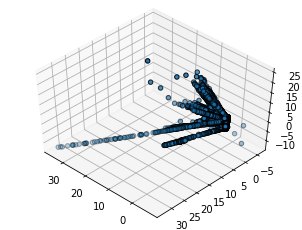

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, elev=48, azim=134)
plt.cla()
ax.scatter(new_most['pca1'], new_most['pca2'], new_most['pca3'], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

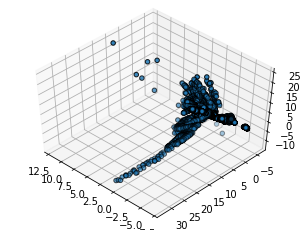

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, elev=48, azim=134)
plt.cla()
ax.scatter(new_most['pca4'], new_most['pca2'], new_most['pca3'], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

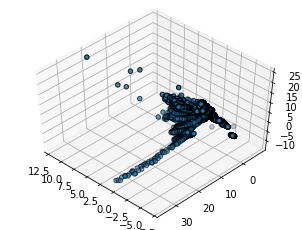

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, elev=48, azim=134)
plt.cla()
ax.scatter(new_most['pca4'], new_most['pca1'], new_most['pca3'], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

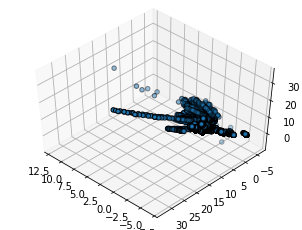

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, elev=48, azim=134)
plt.cla()
ax.scatter(new_most['pca4'], new_most['pca2'], new_most['pca1'], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

In [ ]:
new_most1 = new_most[new_most.date == '2020-03-29']

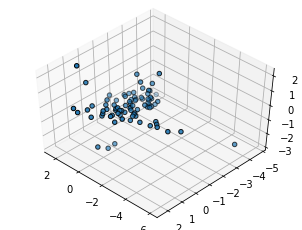

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, elev=48, azim=134)
plt.cla()
ax.scatter(new_most1['pca4'], new_most1['pca2'], new_most1['pca3'], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

In [ ]:
most.drop(columns = ['pca1','pca2','pca3','pca4'], inplace = True)

In [ ]:
most[most['location'] == 'United States']

,days_from_first_case,location,date,first_case_date,population,iso_code,total_cases,new_cases,life_expectancy,continent,total_cases_per_million,new_cases_per_million,new_cases_smoothed,new_deaths_smoothed,population_density,diabetes_prevalence,new_deaths_smoothed_per_million,new_cases_smoothed_per_million,cardiovasc_death_rate,human_development_index,gdp_per_capita,median_age,aged_70_older,aged_65_older,hospital_beds_per_thousand,stringency_index,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,reproduction_rate,group_column
55060,43 days,United States,2020-03-05,2020-01-22,331002647.0,USA,184.0,77.0,78.86,North America,0.556,0.233,23.857,1.714,35.608,10.79,0.005,0.072,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,20.37,12.0,1.0,0.036,0.003,3.73,1
55061,44 days,United States,2020-03-06,2020-01-22,331002647.0,USA,237.0,53.0,78.86,North America,0.716,0.160,31.429,2.000,35.608,10.79,0.006,0.095,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,20.37,14.0,2.0,0.042,0.006,3.60,1
55062,45 days,United States,2020-03-07,2020-01-22,331002647.0,USA,403.0,166.0,78.86,North America,1.218,0.502,54.000,2.286,35.608,10.79,0.007,0.163,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,20.37,17.0,3.0,0.051,0.009,3.61,1
55063,46 days,United States,2020-03-08,2020-01-22,331002647.0,USA,519.0,116.0,78.86,North America,1.568,0.350,69.571,2.857,35.608,10.79,0.009,0.210,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,20.37,21.0,4.0,0.063,0.012,3.41,1
55064,47 days,United States,2020-03-09,2020-01-22,331002647.0,USA,594.0,75.0,78.86,North America,1.795,0.227,77.000,2.286,35.608,10.79,0.007,0.233,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,20.37,22.0,1.0,0.066,0.003,3.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55344,327 days,United States,2020-12-14,2020-01-22,331002647.0,USA,16538023.0,193614.0,78.86,North America,49963.416,584.932,215404.000,2430.571,35.608,10.79,7.343,650.762,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,71.76,300777.0,1484.0,908.685,4.483,1.06,2
55345,328 days,United States,2020-12-15,2020-01-22,331002647.0,USA,16735333.0,197310.0,78.86,North America,50559.514,596.098,212304.143,2496.857,35.608,10.79,7.543,641.397,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,71.76,303761.0,2984.0,917.700,9.015,1.08,2
55346,329 days,United States,2020-12-16,2020-01-22,331002647.0,USA,16982157.0,246824.0,78.86,North America,51305.200,745.686,215860.571,2585.143,35.608,10.79,7.810,652.142,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,71.76,307443.0,3682.0,928.823,11.124,1.10,2
55347,330 days,United States,2020-12-17,2020-01-22,331002647.0,USA,17219177.0,237020.0,78.86,North America,52021.267,716.067,217205.714,2646.000,35.608,10.79,7.994,656.205,151.089,0.924,54225.446,38.3,9.732,15.413,2.77,71.76,310789.0,3346.0,938.932,10.109,1.10,2


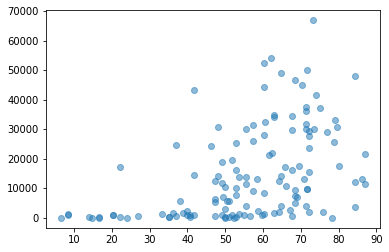

In [ ]:
most1 = most[most['date'] == '2020-12-14']
plt.scatter(most1.stringency_index, most1.total_cases_per_million, alpha = 0.5)

In [ ]:
plt.scatter(most.stringency_index, most.total_cases_per_million, alpha = 0.5)

NameError: ignored

In [ ]:
country_data = most.groupby('location').first()[['life_expectancy','population_density','cardiovasc_death_rate','human_development_index','gdp_per_capita','median_age','aged_70_older','aged_65_older','hospital_beds_per_thousand']]

In [ ]:
country_standard = StandardScaler().fit_transform(country_data)

In [ ]:
pca1 = PCA(n_components=3)

In [ ]:
new = pca1.fit_transform(country_standard)

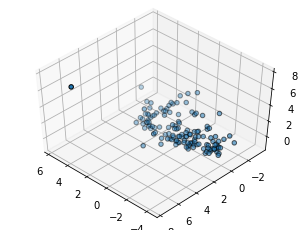

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, elev=48, azim=134)
plt.cla()
ax.scatter(new[:,0], new[:,1], new[:,2], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

In [ ]:
grp = KMeans(n_clusters=4, random_state=0).fit(new)

In [ ]:
grp

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

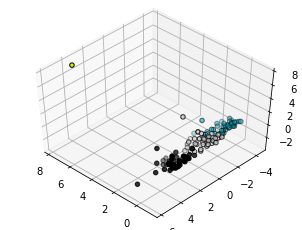

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, elev=48, azim=134)
plt.cla()
ax.scatter(new[:,2], new[:,0], new[:,1], c = grp.labels_, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

In [ ]:
import plotly.express as px
df2 = pd.DataFrame({'x':new[:,2], 'y':new[:,0], 'z':new[:,1], 'c':grp.labels_})
print(df2)
country_data = country_data.reset_index()
for col in df2.columns:
  country_data[col] = df2[col]
country_data.columns

            x         y         z  c
0    1.133875 -3.728043 -1.149067  1
1    0.059126  0.871748 -0.690173  3
2   -0.297001 -0.595845  0.126399  3
3   -0.296133  0.905025 -0.334657  3
4   -0.901769  2.721734  0.512952  0
..        ...       ...       ... ..
131 -0.639499 -0.787816  0.569215  3
132  0.047947 -0.489412  0.016179  3
133  0.738223 -3.466912 -0.820703  1
134 -0.277237 -2.764689  0.122207  1
135  0.094695 -3.083486 -0.282997  1

[136 rows x 4 columns]


Index(['level_0', 'index', 'location', 'life_expectancy', 'population_density',
       'cardiovasc_death_rate', 'human_development_index', 'gdp_per_capita',
       'median_age', 'aged_70_older', 'aged_65_older',
       'hospital_beds_per_thousand', 'x', 'y', 'z', 'c'],
      dtype='object')

In [ ]:
fig = px.scatter_3d(country_data, x='x', y='y', z='z',
              color='c',hover_data=['location', 'life_expectancy', 'population_density',
       'cardiovasc_death_rate', 'human_development_index', 'gdp_per_capita',
       'median_age', 'aged_70_older', 'aged_65_older',
       'hospital_beds_per_thousand'])
fig.show()

In [ ]:
toy = df[['location','date','total_cases_per_million']]
toy = toy[(toy['location'] != 'Hong Kong') & (toy['location'] != 'International')]

In [ ]:
pivoted_df = toy.pivot(index = 'date', columns = 'location', values = 'total_cases_per_million').fillna(1)

In [ ]:
for col in pivoted_df.columns:
  pivoted_df[col] = pivoted_df[col].pct_change()

In [ ]:
corrMatrix = pivoted_df.corr()
names = ['Mexico','United States','China','Vietnam','South Korea','South Africa','Afghanistan','Brazil','Germany','United Kingdom','Ireland','India']
temp = corrMatrix.loc[names,names]

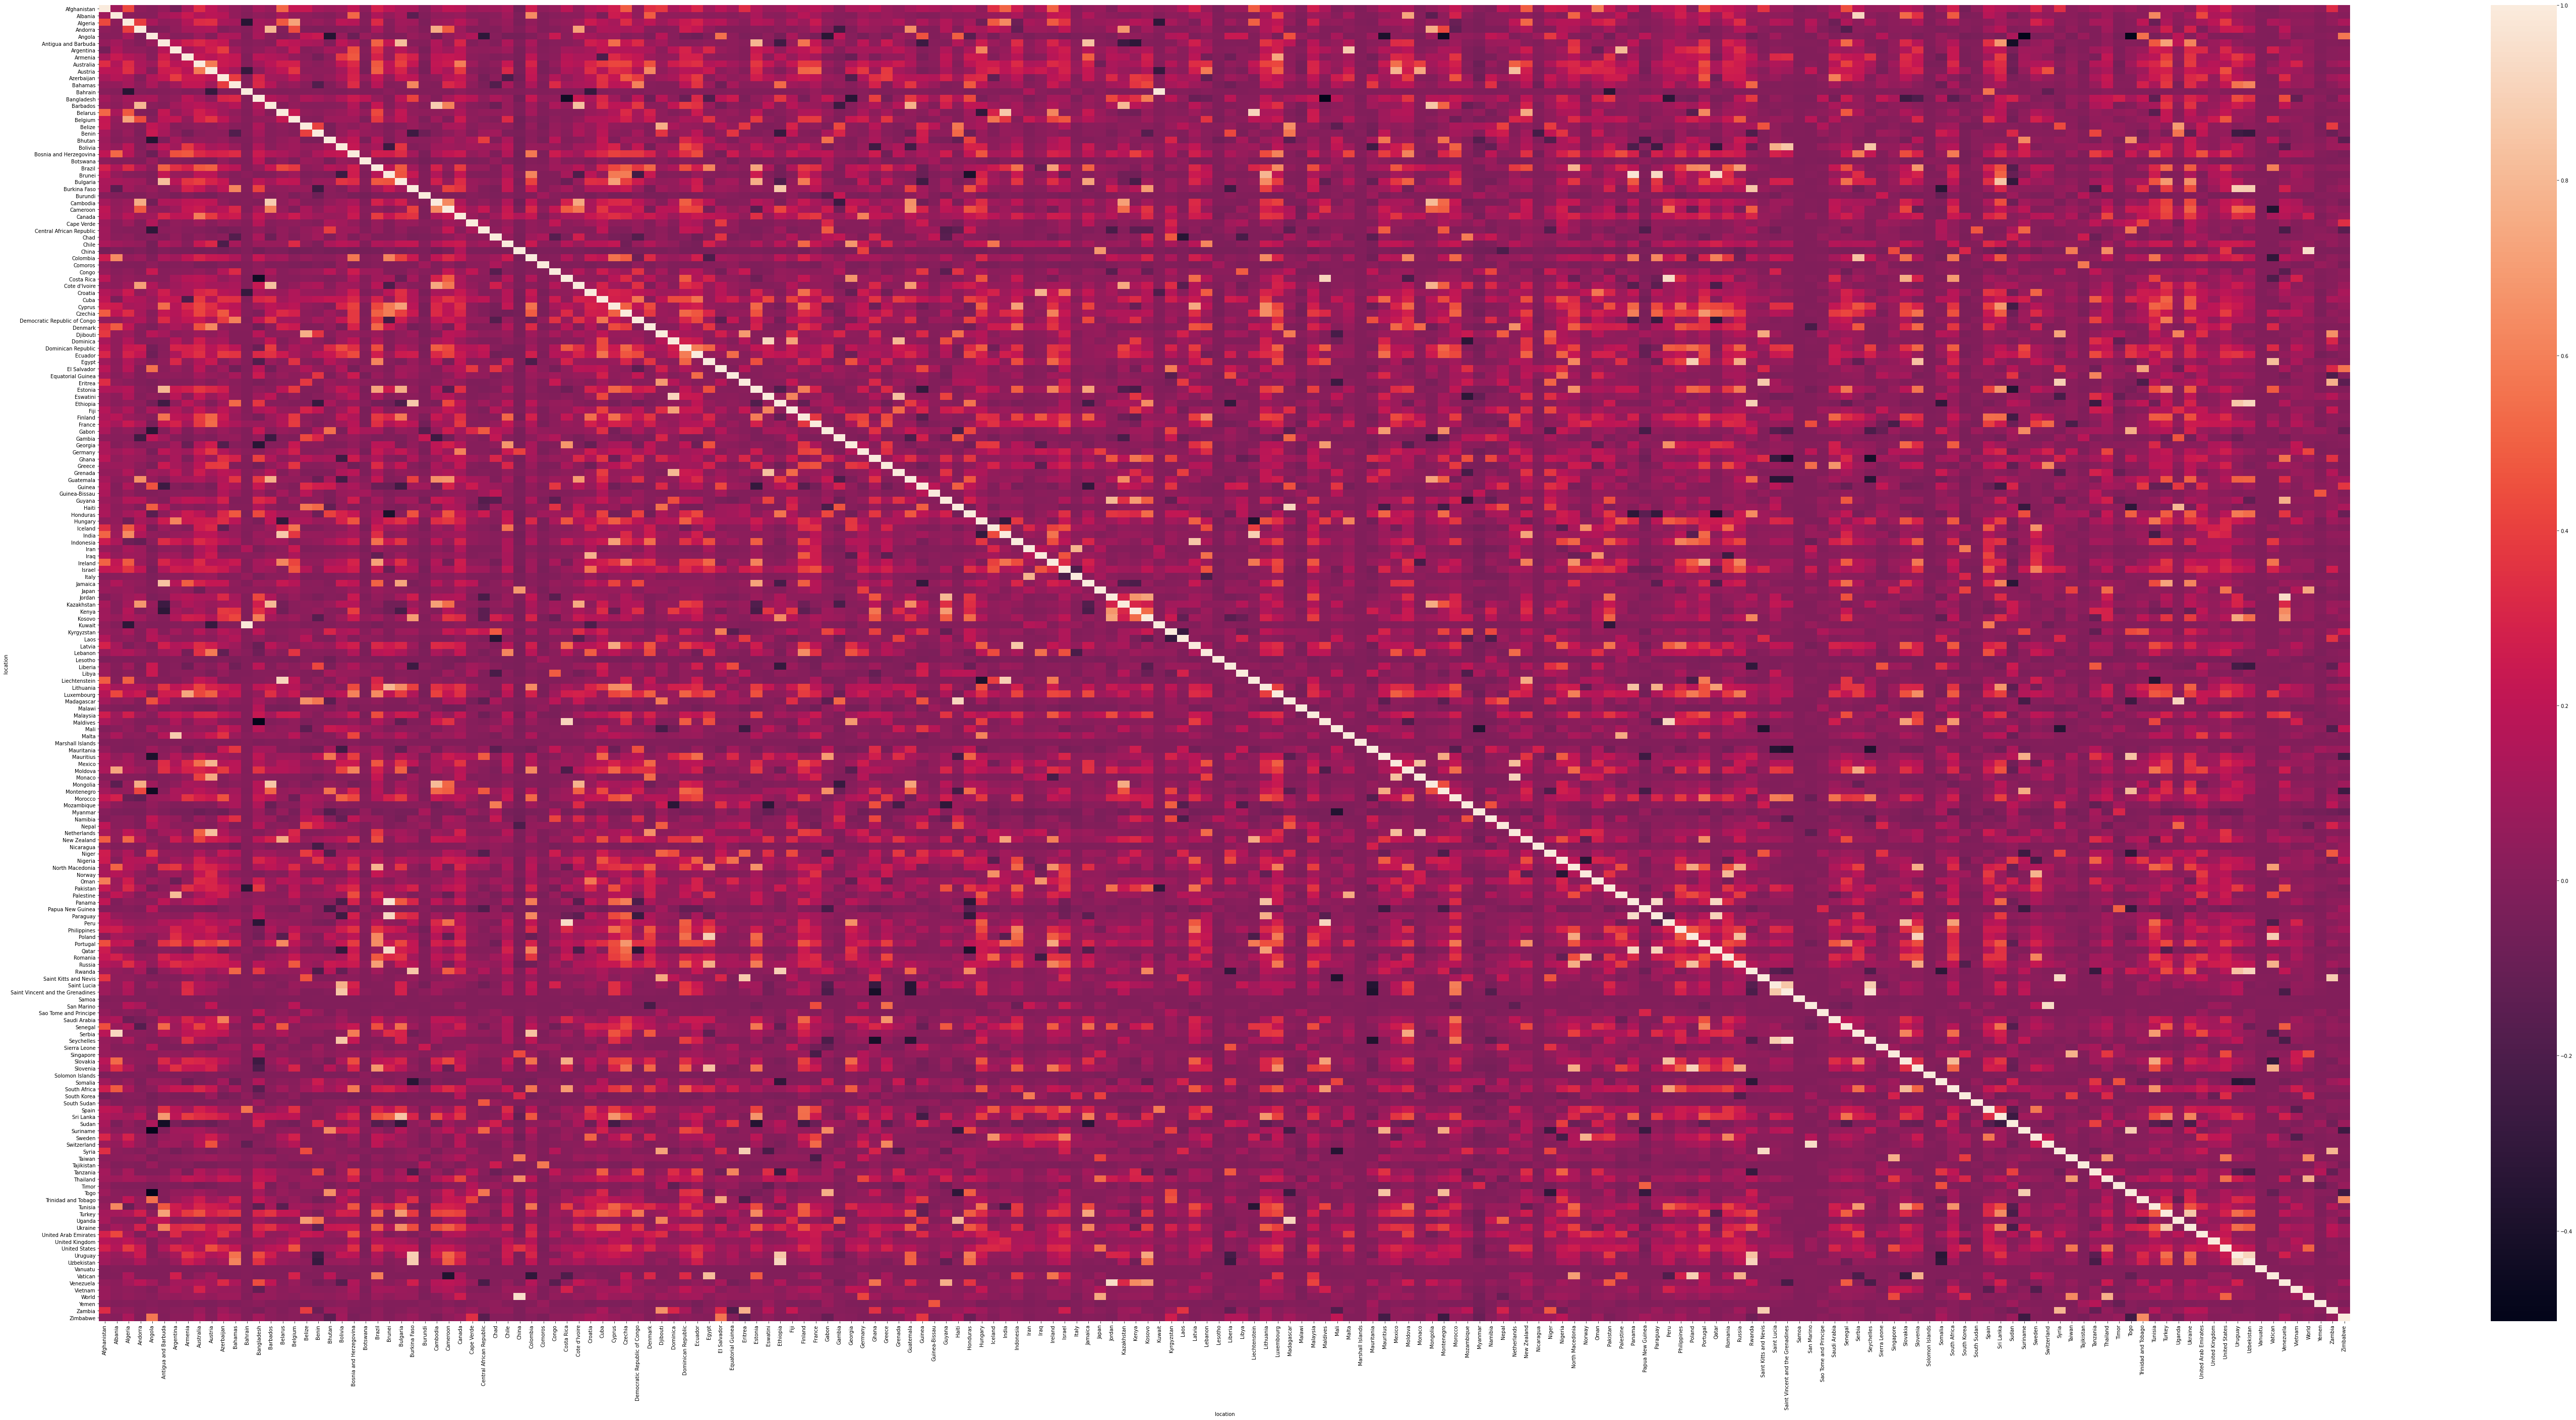

In [ ]:
corrMatrix = pivoted_df.corr()
plt.figure(figsize=(100, 48))
sns.heatmap(corrMatrix)
plt.show()

In [ ]:
s = corrMatrix.unstack()
so = s.sort_values(kind="quicksort")

print(so[-250:-190])

(370, 190)
location                          location                        
Eritrea                           Syria                               0.884596
Syria                             Eritrea                             0.884596
Liechtenstein                     India                               0.885341
India                             Liechtenstein                       0.885341
Egypt                             Poland                              0.886563
Poland                            Egypt                               0.886563
                                  Vatican                             0.886994
Vatican                           Poland                              0.886994
Ethiopia                          Rwanda                              0.894217
Rwanda                            Ethiopia                            0.894217
Paraguay                          Qatar                               0.900595
Qatar                             Paraguay           

In [ ]:
toy

,location,date,total_cases_per_million
0,Afghanistan,2020-02-24,0.026
1,Afghanistan,2020-02-25,0.026
2,Afghanistan,2020-02-26,0.026
3,Afghanistan,2020-02-27,0.026
4,Afghanistan,2020-02-28,0.026
...,...,...,...
58149,Zimbabwe,2020-12-16,790.490
58150,Zimbabwe,2020-12-17,798.362
58151,Zimbabwe,2020-12-18,810.540
58152,Zimbabwe,2020-12-19,817.537


In [ ]:
toy.date = pd.to_datetime(toy.date)

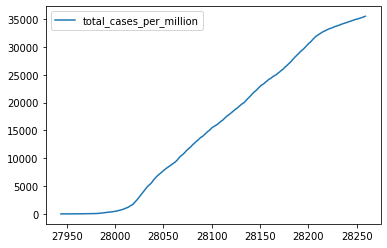

In [ ]:
sns.lineplot(data = toy[(toy['location'] == 'Bhrain') | (toy['location'] == 'Kuwait')])

In [ ]:
sns.lineplot(data = toy[(toy['location'] == 'Bhrain') | (toy['location'] == 'Kuwait')])

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

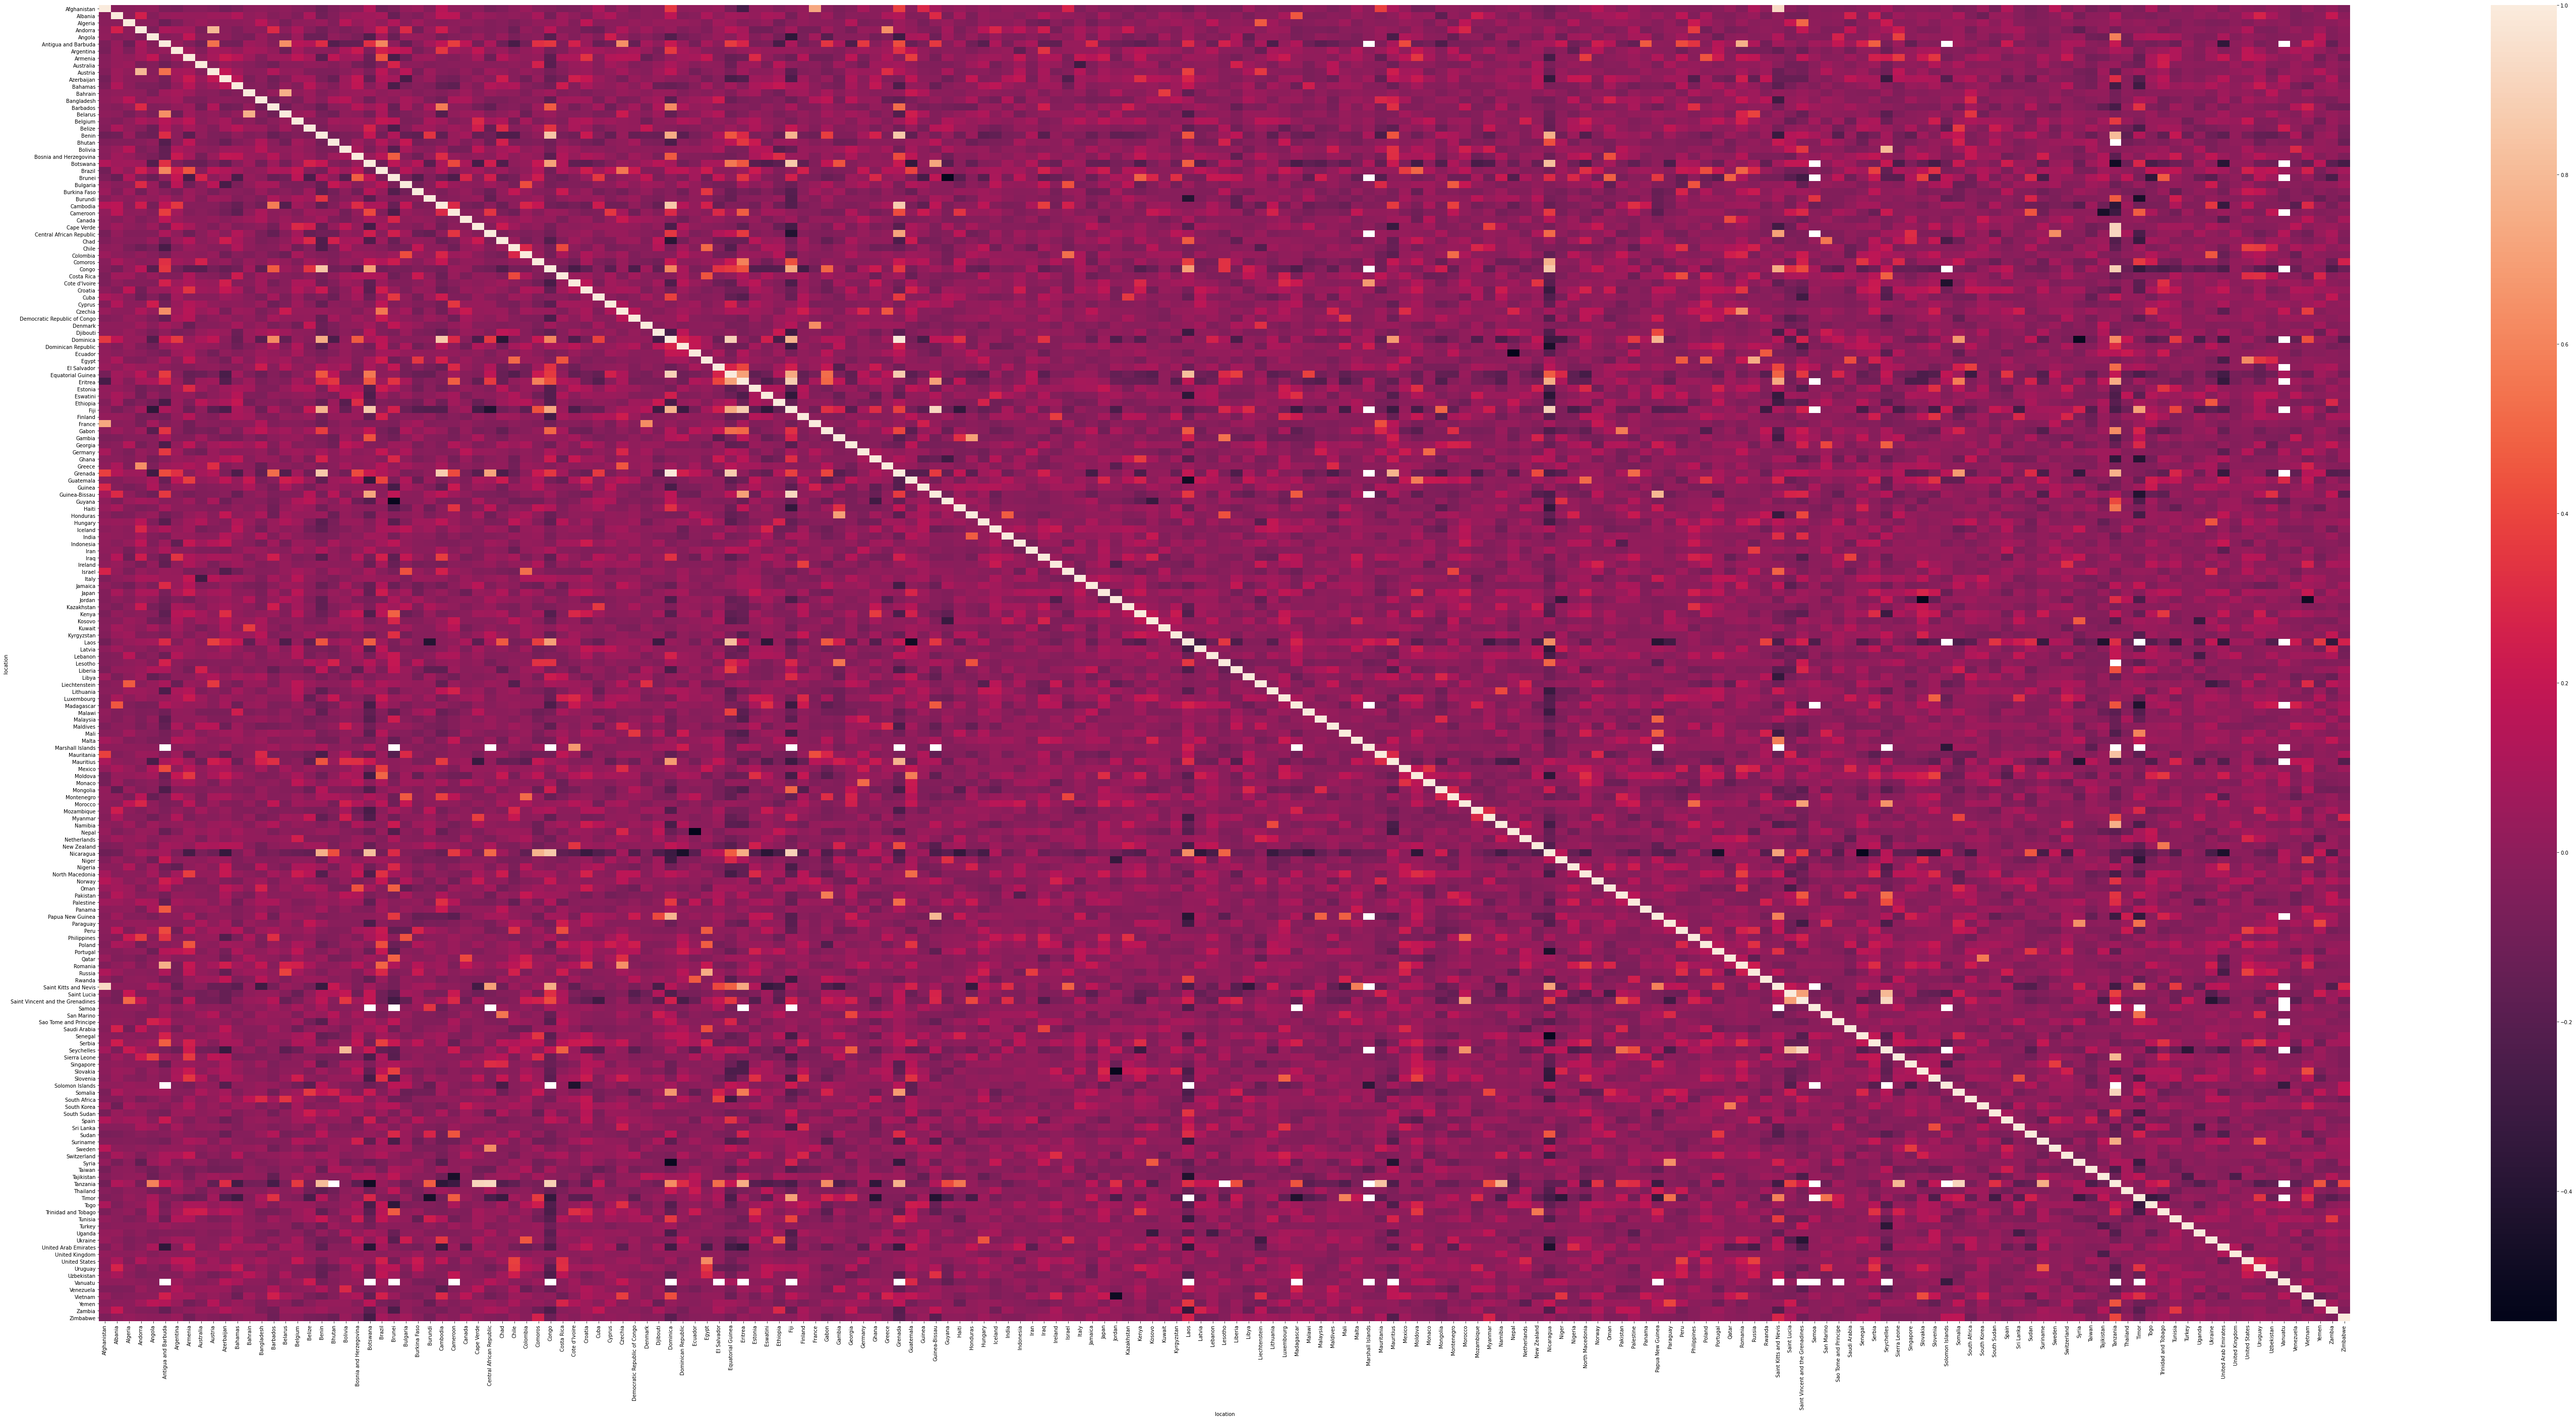

In [ ]:
toy = df[['location','date','new_cases_per_million']]
toy = toy[(toy['location'] != 'Hong Kong') & (toy['location'] != 'International') & (toy['location'] != 'World') & (toy['location'] != 'China') & (toy['location'] != 'Vatican')]
pivoted_df = toy.pivot(index = 'date', columns = 'location', values = 'new_cases_per_million').fillna(1)
for col in pivoted_df.columns:
  pivoted_df[col] = pivoted_df[col].pct_change()
corrMatrix = pivoted_df.corr()
plt.figure(figsize=(100, 48))
sns.heatmap(corrMatrix)
plt.show()

In [ ]:
s = corrMatrix.unstack()
so = s.sort_values(kind="quicksort")

print(so[-350:-300])

location                          location                        
Dominica                          Papua New Guinea                    0.777430
                                  Fiji                                0.778366
Fiji                              Dominica                            0.778366
Guinea-Bissau                     Papua New Guinea                    0.788021
Papua New Guinea                  Guinea-Bissau                       0.788021
Tanzania                          Sierra Leone                        0.793368
Sierra Leone                      Tanzania                            0.793368
Saint Lucia                       Seychelles                          0.794168
Seychelles                        Saint Lucia                         0.794168
Austria                           Andorra                             0.799664
Andorra                           Austria                             0.799664
Seychelles                        Bolivia                       